# High Value Customers Identification (Insiders) #
**By: Marx Cerqueira**

DESCRIPTION
Background of Problem Statement:
A UK-based online retail store has captured the sales data for different products for the period of one year (Nov 2016 to Dec 2017).

The organization sells gifts primarily on the online platform. The customers who make a purchase consume directly for themselves.
There are small businesses that buy in bulk and sell to other customers through the retail outlet channel.

Project Objective:
Find significant customers for the business who make high purchases of their favourite products. The organization wants to roll out a loyalty program to the high-value customers after identification of segments. Use the clustering methodology to segment customers into groups:

Project Planing IOT

** Input**

## Project Solution Planning

### Input

1. Problema de Negócio
    - Selecionar os clientes mais valiosos para integrar um programa de fidelização
2. Conjunto de dados
    - Vendas de um ecommerce, durante um período de um ano

### Output


1. Indicação das pessoas que farão parte do programa de fidelização (insiders)
    - Lista: client_id > Is insider
             11321     > yes/1
             14332     > no/1
             
2. Relatório com as respostas das perguntas de negócio

    - Quem são as pessoas elegíveis para participar do programa de Insiders ?
    - Quantos clientes farão parte do grupo?
    - Quais as principais características desses clientes ?
    - Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?
    - Qual a expectativa de faturamento desse grupo para os próximos meses ?
    - Quais as condições para uma pessoa ser elegível ao Insiders ?
    - Quais as condições para uma pessoa ser removida do Insiders ?
    - Qual a garantia que o programa Insiders é melhor que o restante da base ?
    - Quais ações o time de marketing pode realizar para aumentar o faturamento?

### Tasks

1. Quem são as pessoas elegíveis para participar do programa de Insiders ? 
    - O que é ser elegível? O que são clientes de maior "valor"?
    - Faturamento: ** criação de features **
        - Alto Ticket Médio (média do valor gasto por cliente, quanto o cliente gasta na média com a empresa;
        - Alto LTV (Life Time Value);
        - Baixa Recência (tempo da última compra), queremos uma recência menor;
        - Alto basket size;
        - Baixa probabilidade de Churn;
        - Alta previsão de LTV;
        - Alta propensão de compra;
        
    - Custos:
        - Baixa taxa de devolução; A empresa tem um custo por devolução, normalmente essa taxa é definida no modelo de negócio da empresa (business plan);        
        
    - Experiência de compra:
        - Média alta das avaliações
    
2. Quantos clientes farão parte do grupo?
    - Número total de clientes
    - % do grupo Insiders
    
    
3. Quais as principais características desses clientes ?
    - Escrever as características do cliente:
        - Idade
        - Localização 
        - em resumo é o look a like
    - Escrever características do consumo.
        - Atributos da clusterização;

4. Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?
    - Faturamento total do ano
    - Faturamento do grupo Insiders (verificar quantos % da receita total vem desse grupo)
    
5. Qual a expectativa de faturamento desse grupo para os próximos meses ?
    - LTV do grupo Insiders
    - Análise de Cohort
6. Quais as condições para uma pessoa ser elegível ao Insiders ?
    - Definir a periodicidade do modelo (1 mes, 3 meses...)
    - A pessoa precisa ser similar ou parecido com uma pessoa do grupo
    
7. Quais as condições para uma pessoa ser removida do Insiders ?
    - Definir a periodicidade do modelo (1 mes, 3 meses...)
    - A pessoa precisa ser desimilar ou não-parecido com uma pessoa do grupo
    
8. Qual a garantia que o programa Insiders é melhor que o restante da base ?
    - Teste A/B
    - Teste A/B Bayesiano
    - Teste de hipóteses.
    
9. Quais ações o time de marketing pode realizar para aumentar o faturamento?
    - Desconto
    - Preferencia de compra
    - Frete
    - Visita a empresa, etc.

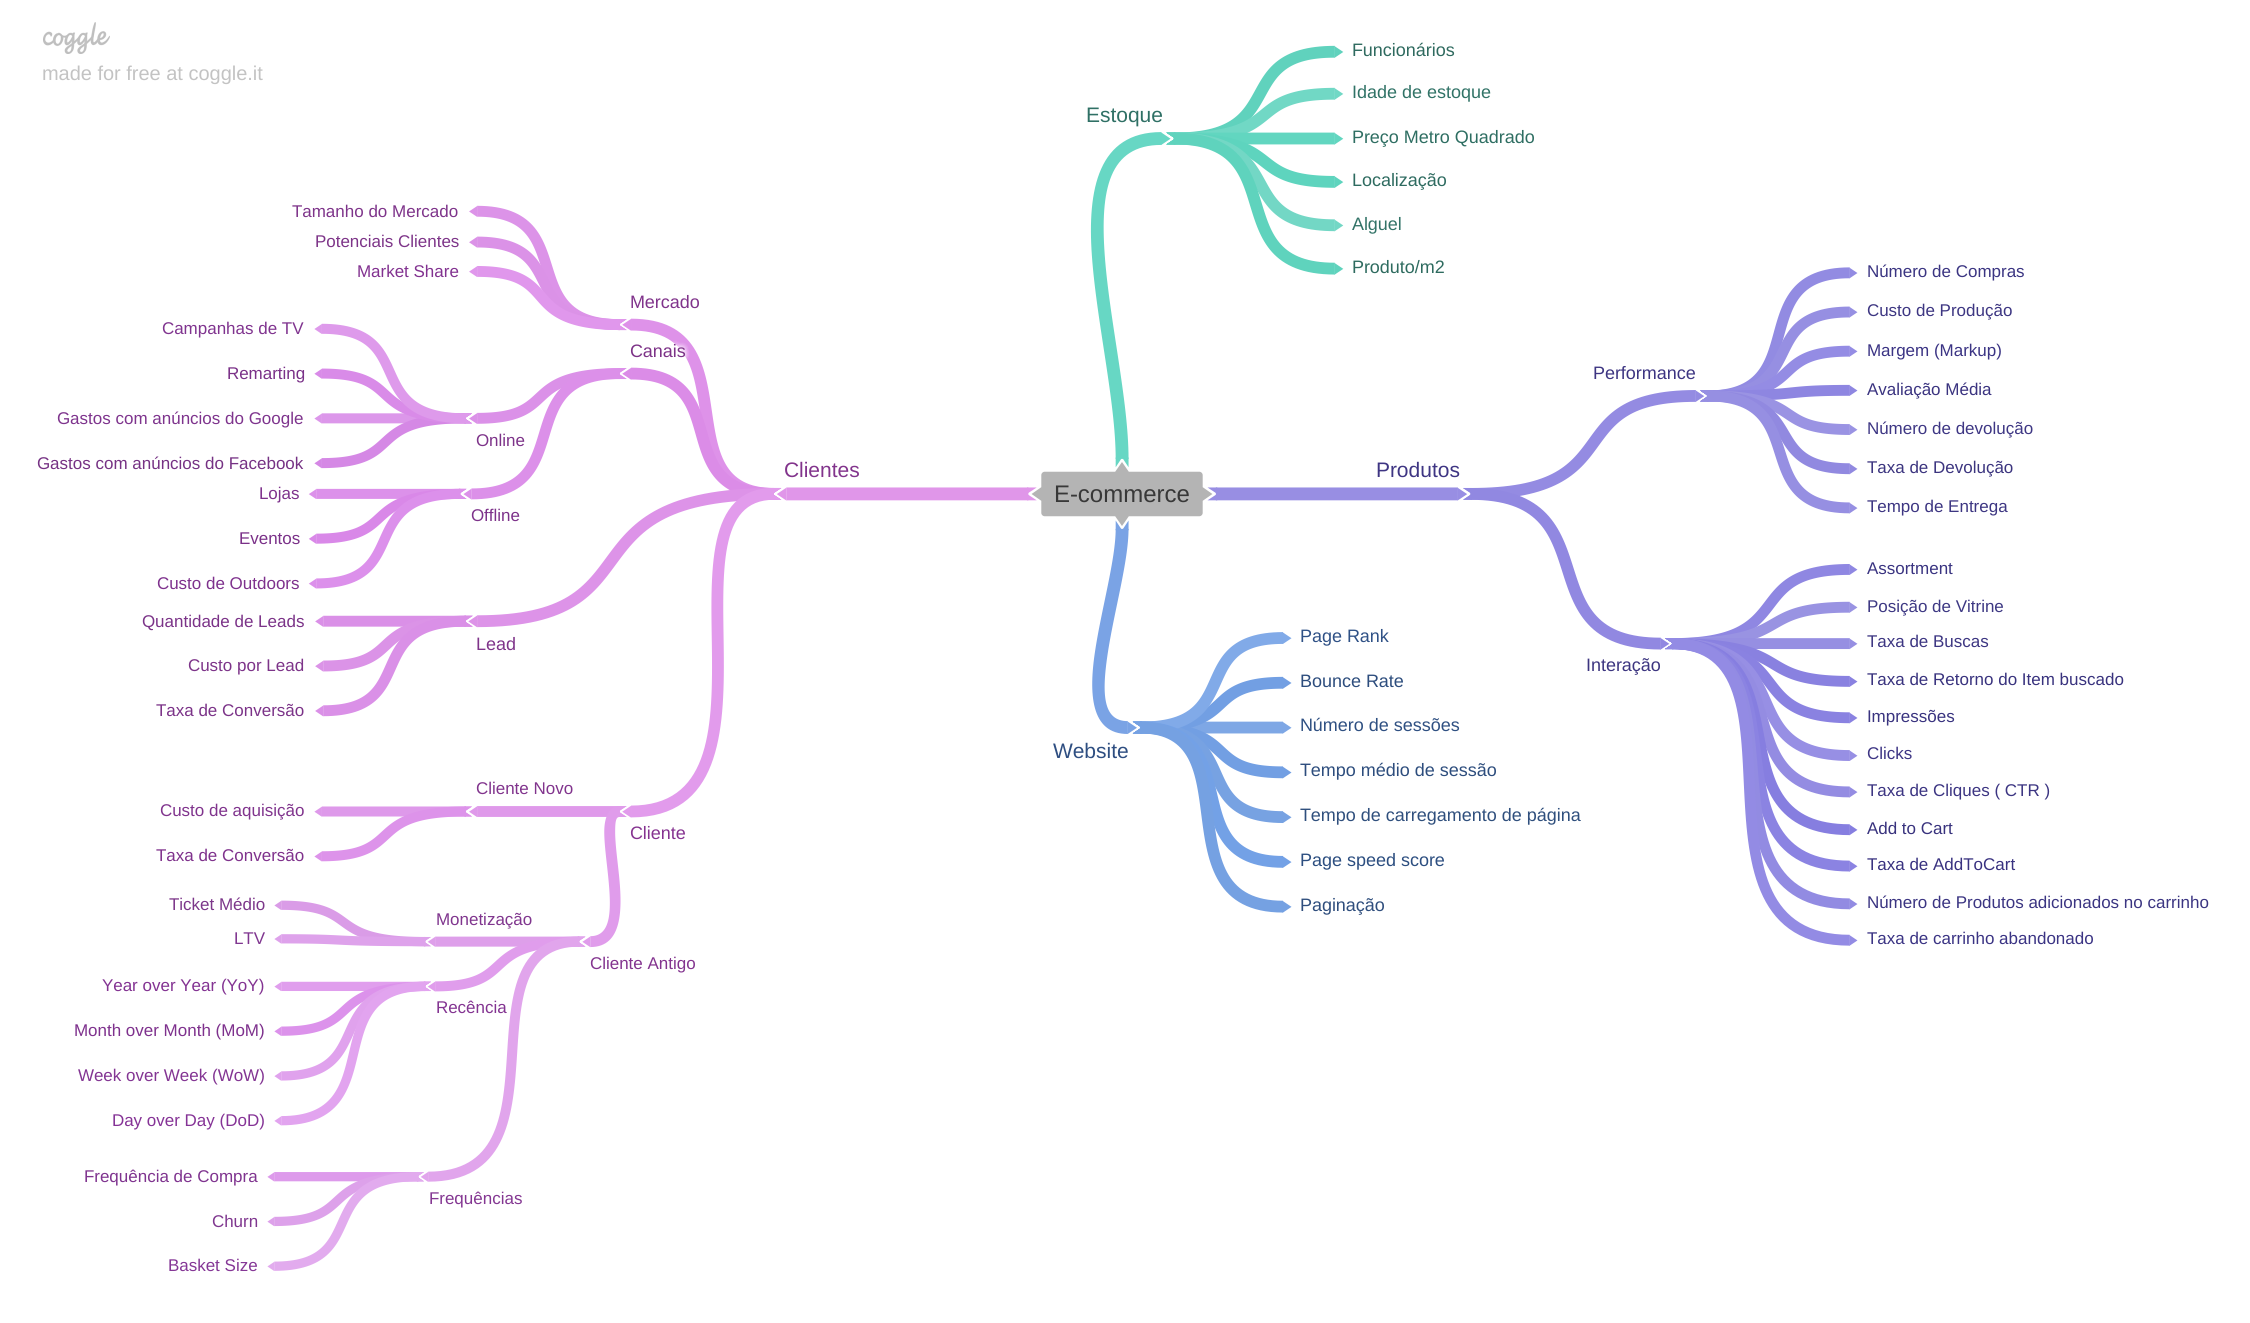

In [1]:
from IPython.display import Image
Image(filename='/home/marxcerqueira/repos/Data-Science-Projects/pa005_insiders_clustering/pa005_marx_cerqueira/reports/figures/mapa_metricas_e_commerce.png')

## E-commerce Metrics

- **Growth Metrics**:
    1. Porcentagem do Marketshare
    2. Número de Clientes Novos
- **Revenue Metrics**:
    1. Número de Vendas
    2. Ticket Médio
    3. LTV ( Long Time Value )
    4. Recência Média
    5. Basket Size Médio
    6. Markup médio
- **Cost Metrics**:
    1. CAC ( Custo de aquisição de Clientes )
    2. Desconto médio
    3. Custo de Produção
    4. Taxa de devolução
    5. Custos Fixos ( Folha de pagamento, escritório, softwares )
    6. Impostos

## Benchmark de Soluções

Desk Research
1. Fazer pesquisas sobre o que as pessoas já fizeram, quais problemas de clusterização resolveram e como resolveram.
2. Leitura dos artigos
3. Resultado: 3 ou 4 soluções que você entendeu, e verificar o que da pra aproveitar para o nosso contexto.

# IMPORTS

In [88]:
import os
import inflection

import pandas  as pd
import numpy   as np
import seaborn as sns

import umap.umap_ as umap

import matplotlib.pyplot as plt


from IPython.core.display    import HTML
from IPython.display         import Image

from plotly  import express as px
from sklearn import cluster as c
from sklearn import metrics as m

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer


## Helper Functions

In [4]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    
# def cramer_v( x, y ):
#     cm = pd.crosstab( x, y ).values # Confusion Matrix
#     n = cm.sum()
#     r, k = cm.shape
    
#     chi2 = ss.chi2_contingency( cm )[0]
#     chi2corr = max( 0, chi2 - (k-1)*(r-1)/(n-1) )
    
#     kcorr = k - (k-1)**2/(n-1)
#     rcorr = r - (r-1)**2/(n-1)
    
#     return np.sqrt( (chi2corr/n) / ( min( kcorr-1, rcorr-1 ) ) )

# def mean_absolute_percentage_error( y, yhat ):
#     return np.mean( np.abs( ( y-yhat ) / y ))

# def mean_percentage_error( y, yhat ):
#     return np.mean( ( y - yhat ) / y )

# def ml_error ( model_name, y, yhat):
#     mae = mean_absolute_error( y,yhat )
#     mape = mean_absolute_percentage_error( y,yhat )
#     rmse = np.sqrt(mean_squared_error( y,yhat ))
    
#     return pd.DataFrame( {'Model Name': model_name,
#                           'MAE': mae,
#                           'MAPE': mape,
#                           'RMSE': rmse}, index=[0])

# def cross_validation( x_training, kfold, model_name, model, verbose=False ):
#     mae_list = []
#     mape_list = []
#     rmse_list = []
    
#     for k in reversed( range( 1, kfold+1 ) ):
#         if verbose:
#             print( '\nKFold Number: {}'.format( k ) )
#         # start and end date for validation 
#         start_date_validation = x_training['date'].max() - datetime.timedelta( days=k*6*7)
#         end_date_validation = x_training['date'].max() - datetime.timedelta( days=(k-1)*6*7)

#         # filtering dataset
#         training = x_training[x_training['date'] < start_date_validation]
#         validation = x_training[(x_training['date'] >= start_date_validation) & (x_training['date'] <= end_date_validation)]

#         # training and validation dataset
#         # training
#         xtraining = training.drop( ['date', 'sales'], axis=1 ) 
#         ytraining = training['sales']

#         # validation
#         xvalidation = validation.drop( ['date', 'sales'], axis=1 )
#         yvalidation = validation['sales']

#         # model
#         m = model.fit( xtraining, ytraining )

#         # prediction
#         yhat = m.predict( xvalidation )

#         # performance
#         m_result = ml_error( model_name, np.expm1( yvalidation ), np.expm1( yhat ) )

#         # store performance of each kfold iteration
#         mae_list.append(  m_result['MAE'] )
#         mape_list.append( m_result['MAPE'] )
#         rmse_list.append( m_result['RMSE'] )

#     return pd.DataFrame( {'Model Name': model_name,
#                           'MAE CV': np.round( np.mean( mae_list ), 2 ).astype( str ) + ' +/- ' + np.round( np.std( mae_list ), 2 ).astype( str ),
#                           'MAPE CV': np.round( np.mean( mape_list ), 2 ).astype( str ) + ' +/- ' + np.round( np.std( mape_list ), 2 ).astype( str ),
#                           'RMSE CV': np.round( np.mean( rmse_list ), 2 ).astype( str ) + ' +/- ' + np.round( np.std( rmse_list ), 2 ).astype( str ) }, index=[0] )


In [5]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## Loading Data

In [6]:
df_ecomm_raw = pd.read_csv('/home/marxcerqueira/repos/Data-Science-Projects/pa005_insiders_clustering/pa005_marx_cerqueira/data/raw/Ecommerce.csv', low_memory = False)

In [7]:
df_ecomm_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN


In [8]:
df_ecomm_raw = df_ecomm_raw.drop(columns = ['Unnamed: 8'], axis = 1)

In [9]:
df_ecomm_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


# DATA DISCRIPTION

In [10]:
# Copy dataset
df0 = df_ecomm_raw.copy()

## Rename Columns

In [11]:
list(df0)

['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country']

In [12]:
cols_old = ['InvoiceNo','StockCode','Description','Quantity', 'InvoiceDate','UnitPrice','CustomerID','Country']

snakecase = lambda x: inflection.underscore(x)
col_news = list(map(snakecase, cols_old))

# Rename columns
df0.columns = col_news

In [13]:
df0.columns

Index(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country'],
      dtype='object')

Attribute Description:

    - InvoiceNo: Invoice number (A 6-digit integral number uniquely assigned to each transaction)
    - StockCode: Product (item) code
    - Description: Product (item) name
    - Quantity The quantities of each product (item) per transaction
    - InvoiceDate: The day when each transaction was generated
    - UnitPrice: Unit price (Product price per unit)
    - CustomerID: Customer number (Unique ID assigned to each customer)
    - Country: Country name (The name of the country where each customer resides)

In [14]:
df0.head(15)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,29-Nov-16,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,29-Nov-16,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,29-Nov-16,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,29-Nov-16,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,29-Nov-16,1.69,13047.0,United Kingdom


## Data Dimension

In [15]:
df0.shape

(541909, 8)

In [16]:
print('Number of rows: {}.'.format(df0.shape[0]))
print('Number of cols: {}.'.format(df0.shape[1]))

Number of rows: 541909.
Number of cols: 8.


## Data Types

In [17]:
# Transforme datatype of variable invoice_date to datetime
df0['invoice_date'] = pd.to_datetime(df0['invoice_date'])

In [18]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    541909 non-null  object        
 1   stock_code    541909 non-null  object        
 2   description   540455 non-null  object        
 3   quantity      541909 non-null  int64         
 4   invoice_date  541909 non-null  datetime64[ns]
 5   unit_price    541909 non-null  float64       
 6   customer_id   406829 non-null  float64       
 7   country       541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [19]:
# df0['invoice_no'] = df0['invoice_no'].astype('int')

## Check NA Values

In [20]:
missing_count = df0.isnull().sum() # the count of missing values
value_count = df0.isnull().count() # the total values count

missing_percentage = round(missing_count/value_count*100,2) # the percentage of missing values
missing_df = pd.DataFrame({'missing value count': missing_count, 'percentage': missing_percentage})
missing_df

,missing value count,percentage
invoice_no,0,0.00
stock_code,0,0.00
description,1454,0.27
quantity,0,0.00
invoice_date,0,0.00
unit_price,0,0.00
customer_id,135080,24.93
country,0,0.00


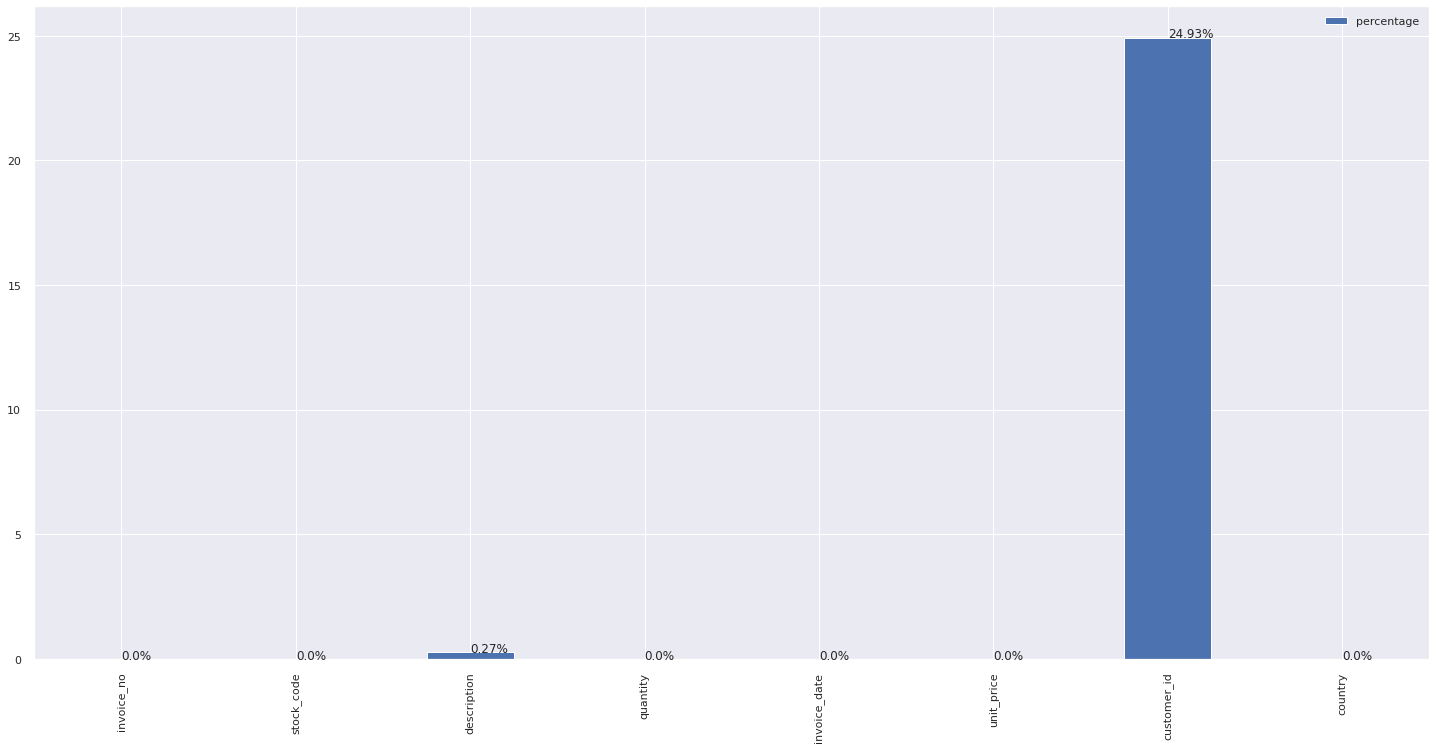

In [21]:
barchart = missing_df.plot.bar(y='percentage')
for index, percentage in enumerate( missing_percentage ):
    barchart.text( index, percentage, str(percentage)+'%')

## Fillout NA

In [22]:
# remove NA because is just the first cicle of the project, focus on aggregate value to the company with first insights
df0 = df0.dropna(subset = ['description', 'customer_id'])

In [23]:
df0.shape

(406829, 8)

In [24]:
df0.isna().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

## Change Types

In [25]:
df0.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id            float64
country                 object
dtype: object

In [26]:
df0['customer_id'] = df0['customer_id'].astype('int64')

In [27]:
df0.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id              int64
country                 object
dtype: object

## Descriptive Statistics

In [28]:
df0.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity,406829.0,12.061303,248.693370,-80995.0,2.00,5.00,12.00,80995.0
unit_price,406829.0,3.460471,69.315162,0.0,1.25,1.95,3.75,38970.0
customer_id,406829.0,15287.690570,1713.600303,12346.0,13953.00,15152.00,16791.00,18287.0


# FEATURE ENGINEERING

In [70]:
df1 = df0.copy()

## Feature Creation

In [71]:
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850,United Kingdom


In [72]:
# data reference
# RFM Model, creating feature for it

df_ref = df1.drop(['invoice_no', 'stock_code', 'description',
                   'quantity', 'invoice_date', 'unit_price',
                   'country'], axis = 1).drop_duplicates(ignore_index = True)
df_ref.head()

,customer_id
0,17850
1,13047
2,12583
3,13748
4,15100


In [73]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    406829 non-null  object        
 1   stock_code    406829 non-null  object        
 2   description   406829 non-null  object        
 3   quantity      406829 non-null  int64         
 4   invoice_date  406829 non-null  datetime64[ns]
 5   unit_price    406829 non-null  float64       
 6   customer_id   406829 non-null  int64         
 7   country       406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.9+ MB


In [74]:
# Creating features
# gross revenue (faturamento) = quantity * price
df1['gross_revenue'] = df1['quantity'] * df1['unit_price']

# Monetary
df_monetary = df1[['customer_id', 'gross_revenue']].groupby('customer_id').sum().reset_index()
df_ref = pd.merge(df_ref, df_monetary, on = 'customer_id', how = 'left')

# Recency - Last day purchase
df_recency = df1[['customer_id', 'invoice_date']].groupby('customer_id').max().reset_index()
df_recency['recency_days'] = (df1['invoice_date'].max() - df_recency['invoice_date']).dt.days
df_recency = df_recency[['customer_id', 'recency_days']].copy()

df_ref = pd.merge(df_ref, df_recency, on = 'customer_id', how = 'left')

# Frequency
df_freq = df1[['customer_id', 'invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index().rename(columns = {'invoice_no': 'purchase_frequency'})
df_ref = pd.merge(df_ref, df_freq, on = 'customer_id', how = 'left')

#Avg Ticket
df_avg_ticket = df1[['customer_id', 'gross_revenue']].groupby('customer_id').mean().reset_index().rename(columns = {'gross_revenue': 'avg_ticket'})
df_ref = pd.merge(df_ref, df_avg_ticket, on = 'customer_id', how = 'left')

In [75]:
df_ref.head()

,customer_id,gross_revenue,recency_days,purchase_frequency,avg_ticket
0,17850,5288.63,302,35,16.950737
1,13047,3079.10,31,18,15.709694
2,12583,7187.34,2,18,28.634821
3,13748,948.25,95,5,33.866071
4,15100,635.10,330,6,105.850000


# VARIABLE FILTERING

In [76]:
df2 = df_ref.copy()

## Line Filtering

## Columns Selection

# EXPLORATORY DATA ANALYSIS (EDA)

In [77]:
df3 = df2.copy()

## Univariate Analysis

### Response Variable

### Numerical Variable

### Categorical Variable

## Bivariate Analysis

## Multivariate Analysis

# DATA PREPARATION

In [78]:
df4 = df3.copy()

## Feature Normalization

## Feature Rescaling

## Feature Transformation

### Enconding

### Target Variable Transformation

### Nature Transformation

# FEATURE SELECTION

In [79]:
df5 = df4.copy()

# HYPERPARAMETER FINE-TUNNING

In [39]:
## clusterização é obrigado a fazer Rescaling para que as variáveis tenham o mesmo tamanho.
## Assistir live PCA

In [80]:
df6 = df5.copy()

In [81]:
X = df6.drop('customer_id', axis = 1)

In [82]:
X.head()

,gross_revenue,recency_days,purchase_frequency,avg_ticket
0,5288.63,302,35,16.950737
1,3079.10,31,18,15.709694
2,7187.34,2,18,28.634821
3,948.25,95,5,33.866071
4,635.10,330,6,105.850000


## Whitin-Cluster Sum of Square (WSS)

In [83]:
clusters = [2, 3, 4, 5, 6, 7]

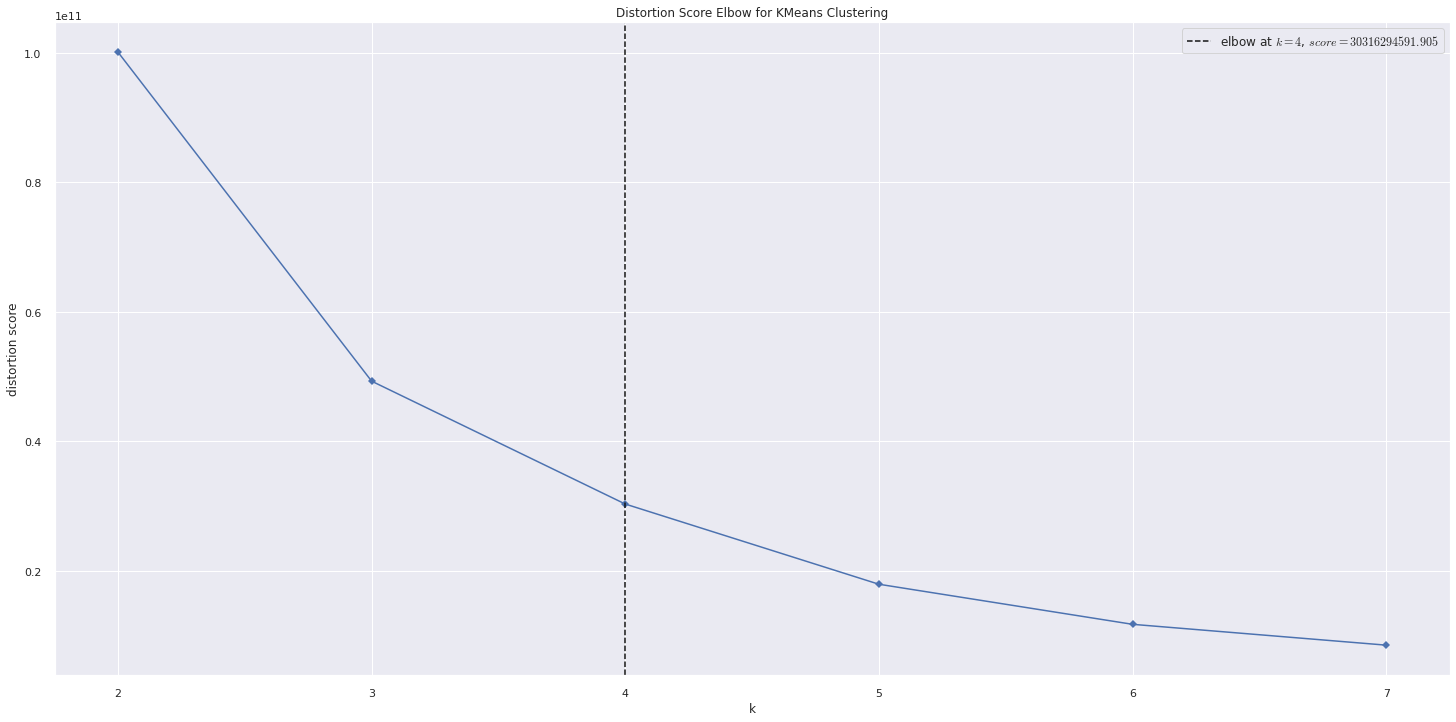

In [84]:
kmeans = KElbowVisualizer(c.KMeans(), k = clusters, timings = False)
kmeans.fit(X)
kmeans.show();
# quero clusters condensados (distancia do centroide e pontos no mesmo cluster pequena) e espaçados (distancia entre centroides de clusters alta). ONde consigo? Onde há maior variação (elbow)

## Sillhouette Score

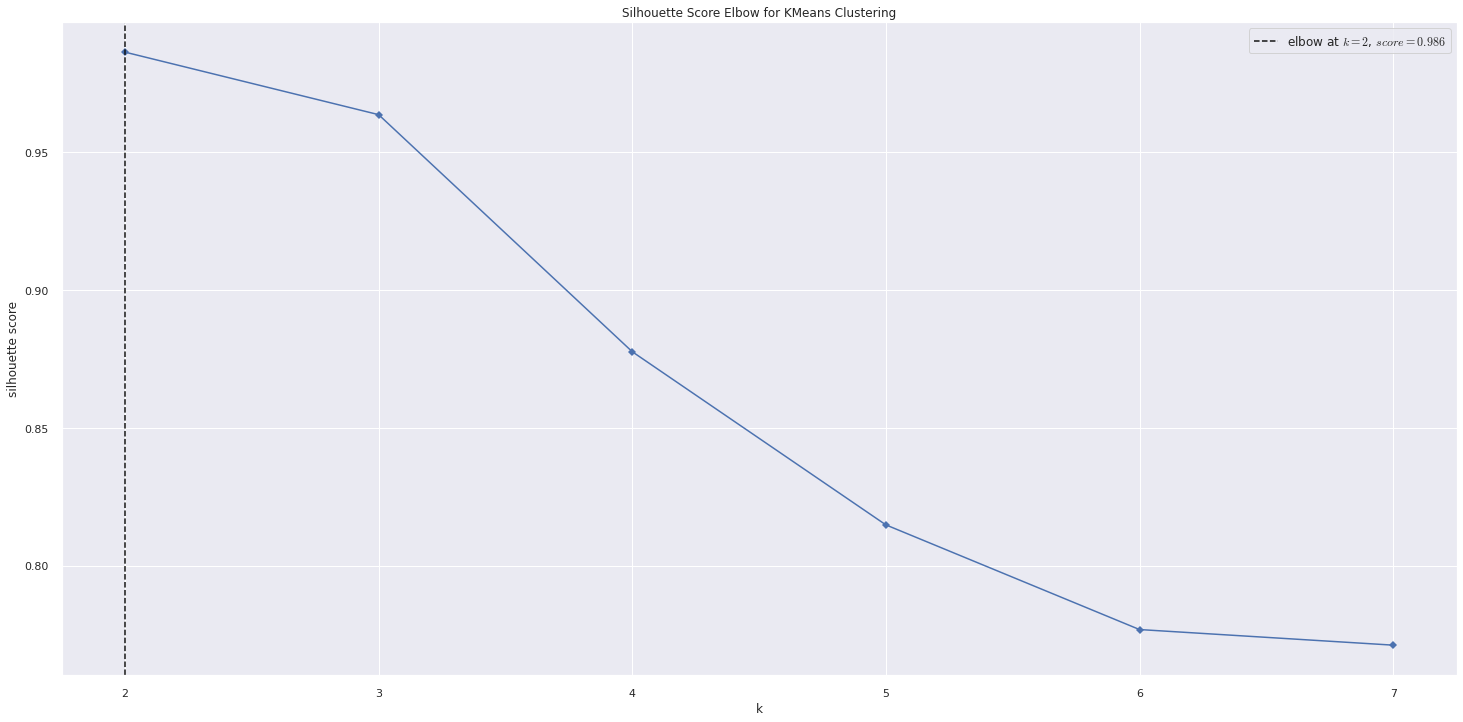

In [85]:
kmeans = KElbowVisualizer(c.KMeans(), k = clusters, metric = 'silhouette', timings = False)
kmeans.fit(X)
kmeans.show();

### Silhouette Analysis

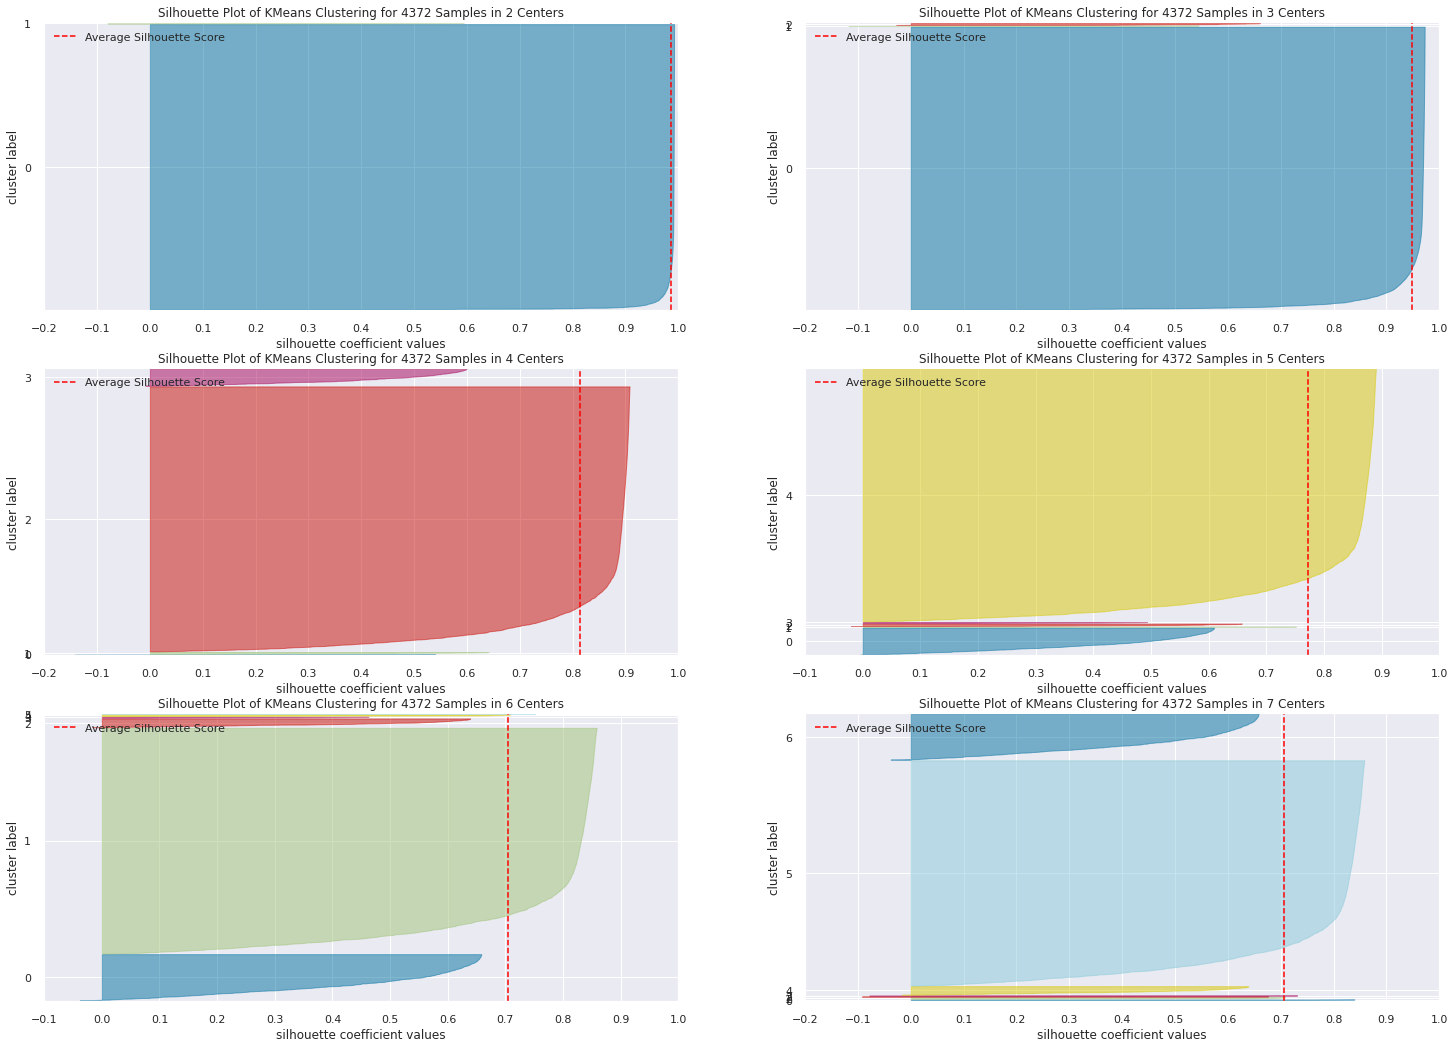

In [93]:
fig, ax = plt.subplots(3, 2, figsize = (25, 18))

for k  in clusters:
    km = c.KMeans(n_clusters = k, init = 'random', n_init = 10, max_iter = 100, random_state = 42)
    #truque: divisão com moda (para visualizacao)
    q, mod = divmod(k, 2)
    
    visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick', ax = ax[q-1][mod])
    visualizer.fit(X)
    visualizer.finalize();

. Silhueta bem ruim a priore, o cluster maior está absorvendo os menores, se sobressaindo.

. Apenas com essas features criadas

ainda não fizemos extração dos prod retornados, dados bagunçados q podem estar confundindo o algoritmo, nao fizemos rescala para uma comparação mais justa das features, nao criamos novas features

. series temporais e clusterização é mais fácil fazer em R, há funções bem otimizadas já.

# MACHINE LEARNING MODEL TRAINING

## K-Means

In [97]:
# model definition
k = 4;
kmeans = c.KMeans(init = 'random', n_clusters = k, n_init = 10, max_iter = 300, random_state = 42)

# model training
kmeans.fit(X)

# clustering
labels = kmeans.labels_

## Cluster Validation

In [98]:
# WSS (Within-cluster Sum of Square )
print('WSS score: {}'.format(kmeans.inertia_))

# SS (Silhouette Score)
print('SS score: {}'.format(m.silhouette_score(X, labels, metric = 'euclidean')))

WSS score: 40056254626.300026
SS score: 0.8139972028952442


## Compare Model's Performance

# CLUSTER ANALYSIS

In [99]:
df9 = df6.copy()
df9['cluster'] = labels
df9.head()

,customer_id,gross_revenue,recency_days,purchase_frequency,avg_ticket,cluster
0,17850,5288.63,302,35,16.950737,3
1,13047,3079.10,31,18,15.709694,2
2,12583,7187.34,2,18,28.634821,3
3,13748,948.25,95,5,33.866071,2
4,15100,635.10,330,6,105.850000,2


## Visualization Inspection

In [100]:
# # apenas para 3 features
# fig = px.scatter_3d(df9, x = 'recency_days', y = 'purchase_frequency', z = 'gross_revenue', color = 'cluster')
# fig.show();

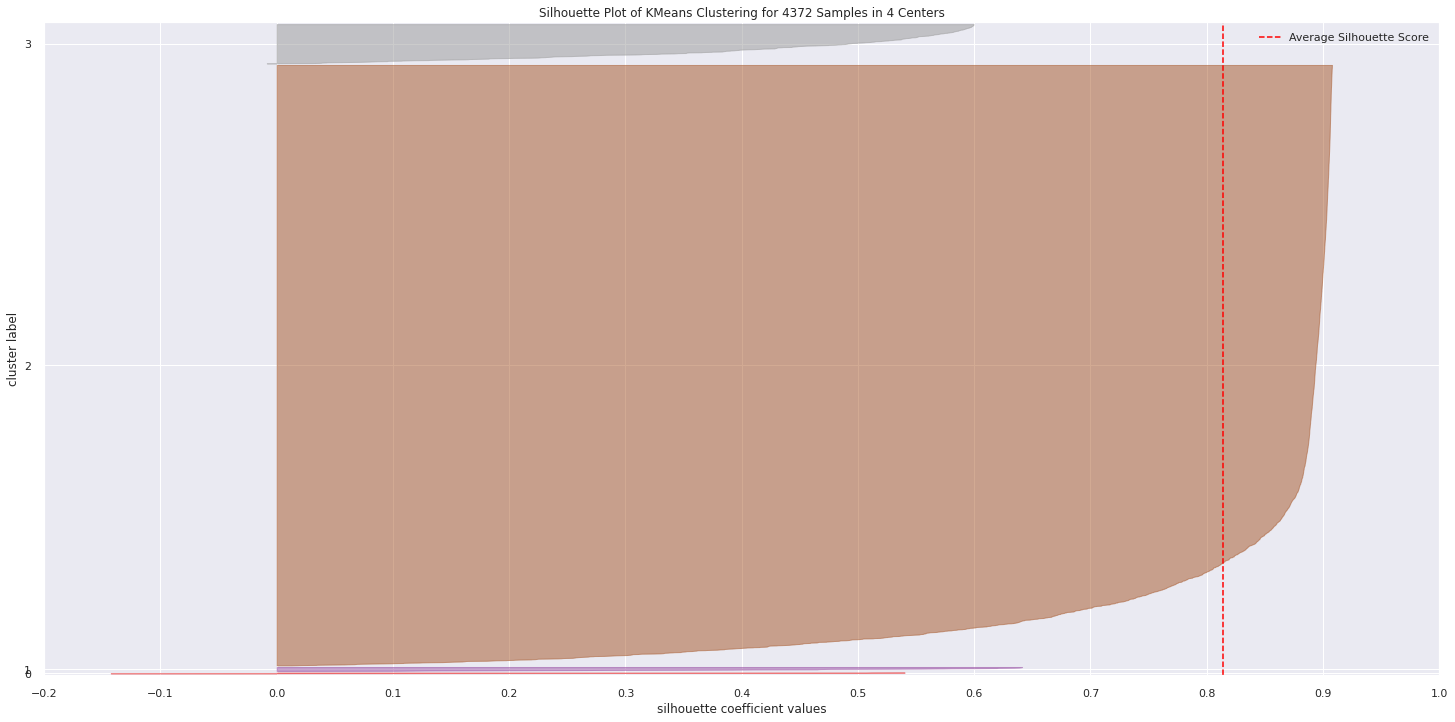

In [102]:
visualizer = SilhouetteVisualizer(kmeans, colores = 'yellowbrick')
visualizer.fit(X)
visualizer.finalize()

## 2D plot

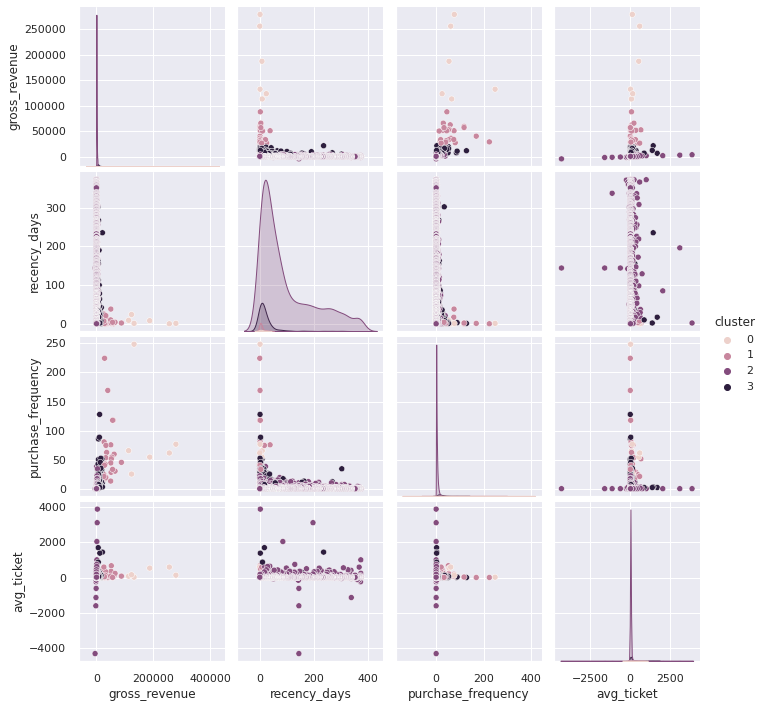

In [106]:
df_viz = df9.drop(columns = 'customer_id', axis = 1)
sns.pairplot(df_viz, hue = 'cluster')

## UMAP - t-SNE

**Machine Learning - Manifold (aprendizado por topologia)**

PCA - Matrix, Espaço de Distâncias - Espaço Hilbert - 9 condições para cumprir - Colorários (garantia para que a distancia naquele espaço funciona

UMAP, t-SNE (2009) - Manifold - Topologia

### UMAP

funciona muito bem quando temos grande volume de dados, mais rápido.
t-SNE para poucos dados é mais rápido

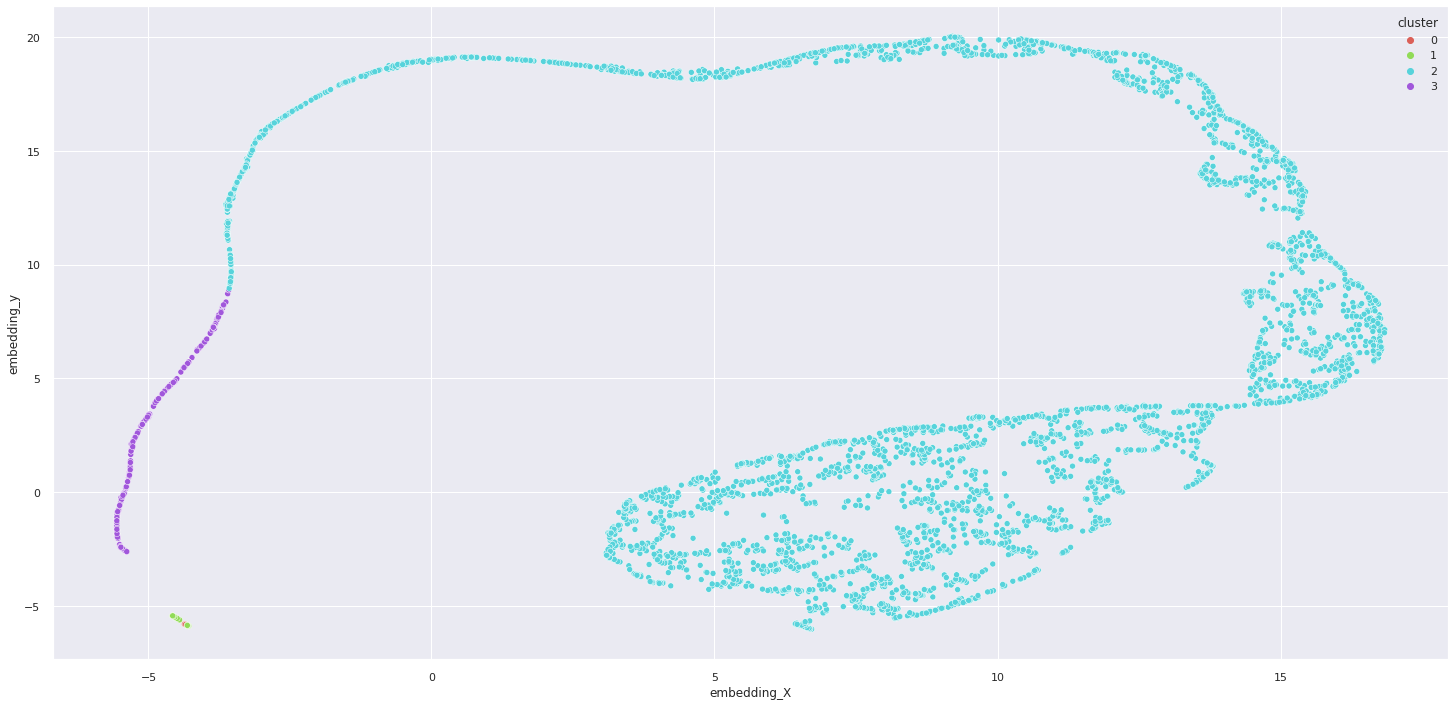

In [120]:
reducer = umap.UMAP(n_neighbors = 20 ,random_state = 42)
embedding = reducer.fit_transform(X) #gera o espaço projetado - embedding é a projeção gerada em outro espaço

#embedding
df_viz['embedding_X'] = embedding[:, 0]
df_viz['embedding_y'] = embedding[:, 1]

#plot UMAP - cluster projetado de alta dimencionalidade
sns.scatterplot(x = 'embedding_X', y = 'embedding_y',
                hue = 'cluster',
                palette = sns.color_palette('hls', n_colors = len(df_viz['cluster'].unique())),
                data = df_viz);


## Cluster Profile

Where we do an analysis of the clusters

In [121]:
# number of customer
df_cluster = df9[['customer_id', 'cluster']].groupby('cluster').count().reset_index()
df_cluster['customer_percentage'] = (df_cluster['customer_id']/df_cluster['customer_id'].sum())*100
 
# Average Gross Revenue
df_avg_gross_revenue = df9[['cluster', 'gross_revenue']].groupby('cluster').mean().reset_index()


# Avarage Recency days
df_avg_recency = df9[['cluster', 'recency_days']].groupby('cluster').mean().reset_index()


# Avarage invoice_no
df_avg_purchase_frequency = df9[['cluster', 'purchase_frequency']].groupby('cluster').mean().reset_index()

# Average ticket
df_ticket = df9[['avg_ticket', 'cluster']].groupby('cluster').mean().reset_index()
 

# merge
df_cluster = pd.merge(df_cluster, df_avg_gross_revenue, how = 'inner', on = 'cluster')
df_cluster = pd.merge(df_cluster, df_avg_recency, how = 'inner', on = 'cluster')
df_cluster = pd.merge(df_cluster, df_avg_purchase_frequency, how = 'inner', on = 'cluster')
df_cluster = pd.merge(df_cluster, df_ticket, how = 'inner', on = 'cluster')

df_cluster

,cluster,customer_id,customer_percentage,gross_revenue,recency_days,purchase_frequency,avg_ticket
0,0,6,0.137237,182181.981667,7.166667,89.000000,253.626345
1,1,28,0.640439,42614.387143,6.178571,57.821429,162.862605
2,2,4071,93.115279,946.696250,96.969295,3.641120,25.359654
3,3,267,6.107045,8089.028652,20.280899,19.528090,62.783157


In [51]:
df_cluster['gross_revenue_percentage'] = (df_cluster['gross_revenue']/df_cluster['gross_revenue'].sum())*100
df_cluster['recency_percentage'] = (df_cluster['recency_days']/df_cluster['recency_days'].sum())*100
df_cluster['frequency_percentage'] = (df_cluster['purchase_frequency']/df_cluster['purchase_frequency'].sum())*100

df_cluster

,cluster,customer_id,customer_percentage,gross_revenue,recency_days,purchase_frequency,gross_revenue_percentage,recency_percentage,frequency_percentage
0,0,4335,99.153705,1372.577826,92.257901,4.614533,0.612490,81.850677,3.141171
1,1,6,0.137237,182181.981667,7.166667,89.000000,81.295647,6.358225,60.583430
2,2,31,0.709058,40543.517742,13.290323,53.290323,18.091863,11.791097,36.275399


Cluster 01:

- Number of customers: 6 (0.14% of costumers)
- Recency Average: 7 days (6.36%)
- Purchase Average: 89 purchases
- Gross Revenue Average: $182,181.89 

Cluster 02:

- Number of customers: 31 (0.7% of costumers)
- Recency Average: 14 days
- Purchase Average: 53 purchases
- Gross Revenue Average: $40.543,51

Cluster 03:

- Number of customers: 4335 (99.15% of costumers)
- Recency Average: 92 days
- Purchase Average: 5 purchases
- Gross Revenue Average: $1.372,58

# MODEL DEPLOYMENT